In [1]:
from keras.backend import shape
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.layers import LSTM
import matplotlib.pyplot as plt

import keras
import keras.utils
from keras import utils as np_utils

from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc

from sklearn.decomposition import PCA

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf


from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

#  ConvLSTM
from keras.layers import Dense, Activation, Input, LSTM, Bidirectional, Dropout
from keras.models import Sequential, Model
from keras.layers import Conv1DTranspose, Conv1D, MaxPooling1D

from tensorflow.python.client import device_lib

In [3]:
data_full = pd.read_csv('Fake user.csv') 
#data_full=data_full.head(-30000)
#data_full=data_full.drop(['e0c', 'hc', 'p0', 'fo', 'pi', 'e0l'], axis=1)
#data_full=data_full.head(20000)

data_full.dropna(inplace = True)
data_full.drop_duplicates(inplace = True)

#print(data_full.info()) 
print(data_full.shape)

#print(data_full.isnull().sum())
#print(data_full['pi'].describe())

#print(data_full['flw'].isnull())
#print(data_full.describe())
#print(data_full['class'] < 0.0)

y = data_full["isFake"]
X = data_full.drop("isFake", 1)

(1165, 9)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [21]:
scaler = MinMaxScaler(feature_range = (0,1))
x = scaler.fit_transform(X)

x = x.reshape(1165, 1, 8)

X_train, X_test, y_train , y_test = train_test_split(x , y, test_size=0.3 , random_state = 72)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)


model = models.Sequential()


model.add(LSTM(512,input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu', return_sequences =True))
model.add(LSTM(256,input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu', return_sequences =True))
model.add(LSTM(64,input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu', return_sequences =True))


model.add(Dense(64, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(64 , kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.2))






model.add(layers.Dense(1, activation='sigmoid'))
# FIT / TRAIN model

model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=25, epochs=50,validation_data=(X_test,y_test) )

X_train:  (815, 1, 8)
X_test:  (350, 1, 8)
y_train:  (815,)
y_test:  (350,)
Epoch 1/50
33/33 [==============================] - 6s 49ms/step - loss: 0.7441 - accuracy: 0.8196 - val_loss: 0.5996 - val_accuracy: 0.8400
Epoch 2/50
33/33 [==============================] - 1s 32ms/step - loss: 0.5066 - accuracy: 0.8294 - val_loss: 0.3664 - val_accuracy: 0.9143
Epoch 3/50
33/33 [==============================] - 1s 32ms/step - loss: 0.3438 - accuracy: 0.9166 - val_loss: 0.2851 - val_accuracy: 0.9257
Epoch 4/50
33/33 [==============================] - 1s 30ms/step - loss: 0.2812 - accuracy: 0.9190 - val_loss: 0.2485 - val_accuracy: 0.9400
Epoch 5/50
33/33 [==============================] - 1s 32ms/step - loss: 0.2428 - accuracy: 0.9288 - val_loss: 0.1992 - val_accuracy: 0.9486
Epoch 6/50
33/33 [==============================] - 1s 31ms/step - loss: 0.2256 - accuracy: 0.9288 - val_loss: 0.1779 - val_accuracy: 0.9543
Epoch 7/50
33/33 [==============================] - 1s 32ms/step - loss: 0.219

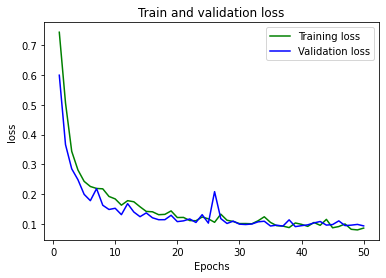

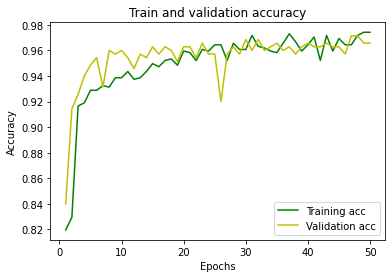

In [22]:
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+ 1)
plt.plot(epochs ,loss,'g',label='Training loss')
plt.plot(epochs ,val_loss,'b',label='Validation loss')
plt.title('Train and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs ,acc,'g',label='Training acc')
plt.plot(epochs ,val_acc,'y',label='Validation acc')
plt.title('Train and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()